# Rijksmuseum CC0 torrent data visualization

There is a 2015 torrent of all the images from the Rijksmuseum collection online at [academic torrents](https://academictorrents.com/details/db3cd9defd6d3f16f0a0e6cd0ada882792b9f782).  At the top level there is a JSON file of metadata and there are 219 tarballs of images in the `images` folder.  We are interested to extract only the paintings, which in the Rijksmuseum object numbering scheme have names starting with SK (schilderijen).

In [2]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [4]:
cd /fast/MVA_2025/data/rijksmuseum_data/

/fast/MVA_2025/data/rijksmuseum_data


In [5]:
import pandas as pd
import json
from tqdm.auto import tqdm
from pathlib import Path
import pyvips

In [6]:
!head rkm_data.json

{"showImage":false,"label":null,"scLabelLine":", China, ca. 1800 - ca. 1900, porselein","subTitle":"h 22,4cm","longTitle":"Vaas van porselein met rood glazuur, ca. 1800 - ca. 1900","physicalMedium":"porselein","physicalProperties":[],"dimensions":[{"value":"22,4","part":null,"type":"hoogte","unit":"cm"}],"principalOrFirstMaker":"","catRefRPK":[],"documentation":[],"inscriptions":[],"historicalPersons":[],"objectTypes":["vaas"],"labelText":null,"description":"Vaas van porselein met rood glazuur. De slanke hals verbreedt zich naar boven toe en gaat van onderen geleidelijk in de buik over. Langs de liprand wit glazuur.","titles":["Vaas van porselein met rood glazuur"],"normalized32Colors":[],"normalizedColors":[],"colorsWithNormalization":[],"colors":[],"links":{"search":"https://www.rijksmuseum.nl/api/nl/collection"},"id":"nl-AK-BR-325","priref":"3866","objectNumber":"AK-BR-325","language":"nl","title":"Vaas van porselein met rood glazuur","copyrightHolder":null,"webImage":null,"objectCo

In [7]:
raw_data = [ json.loads(x) for x in tqdm(open('rkm_data.json').readlines()) ]

  0%|          | 0/515802 [00:00<?, ?it/s]

In [8]:
raw_data[0]

{'showImage': False,
 'label': None,
 'scLabelLine': ', China, ca. 1800 - ca. 1900, porselein',
 'subTitle': 'h 22,4cm',
 'longTitle': 'Vaas van porselein met rood glazuur, ca. 1800 - ca. 1900',
 'physicalMedium': 'porselein',
 'physicalProperties': [],
 'dimensions': [{'value': '22,4',
   'part': None,
   'type': 'hoogte',
   'unit': 'cm'}],
 'principalOrFirstMaker': '',
 'catRefRPK': [],
 'documentation': [],
 'inscriptions': [],
 'historicalPersons': [],
 'objectTypes': ['vaas'],
 'labelText': None,
 'description': 'Vaas van porselein met rood glazuur. De slanke hals verbreedt zich naar boven toe en gaat van onderen geleidelijk in de buik over. Langs de liprand wit glazuur.',
 'titles': ['Vaas van porselein met rood glazuur'],
 'normalized32Colors': [],
 'normalizedColors': [],
 'colorsWithNormalization': [],
 'colors': [],
 'links': {'search': 'https://www.rijksmuseum.nl/api/nl/collection'},
 'id': 'nl-AK-BR-325',
 'priref': '3866',
 'objectNumber': 'AK-BR-325',
 'language': 'nl',


In [9]:
raw_data = [x for x in raw_data if x is not None]

In [10]:
df = pd.DataFrame(raw_data)

In [11]:
df_paint = df.query('objectNumber.str.startswith("SK-") and showImage')
df_paint

,showImage,label,scLabelLine,subTitle,longTitle,physicalMedium,physicalProperties,dimensions,principalOrFirstMaker,catRefRPK,...,associations,acquisition,exhibitions,materials,techniques,productionPlaces,dating,classification,hasImage,imgPath
508928,True,None,"Ludolf Bakhuysen (1631 - 17-nov-1708), 1692, o...","h 53,5cm × b 69cm","Woelige zee, Ludolf Bakhuysen, 1692",olieverf op doek,[],"[{'value': '53,5', 'part': None, 'type': 'hoog...",Ludolf Bakhuysen,[],...,[],"{'creditLine': None, 'date': '1808-01-01T00:00...",[],"[doek, olieverf]",[],[],"{'period': 17, 'yearLate': 1692, 'yearEarly': ...","{'objectNumbers': ['SK-A-10'], 'people': [], '...",True,images/214/SK-A-10.jpeg
508929,True,None,Hendrikus van de Sande Bakhuyzen (02-jan-1795 ...,h 55cm × b 47cm,"Gelders landschap, Hendrikus van de Sande Bakh...",olieverf op paneel,[],"[{'value': '55', 'part': 'drager', 'type': 'ho...",Hendrikus van de Sande Bakhuyzen,[],...,[],"{'creditLine': None, 'date': '1818-01-01T00:00...",[],"[paneel, olieverf]",[],[],"{'period': 19, 'yearLate': 1818, 'yearEarly': ...","{'objectNumbers': ['SK-A-1000'], 'people': [],...",True,images/214/SK-A-1000.jpeg
508930,True,None,Gerardina Jacoba van de Sande Bakhuyzen (27-ju...,"h 68,5cm × b 93cm","Stilleven met bloemen en vruchten, Gerardina J...",olieverf op doek,[],"[{'value': '68,5', 'part': 'drager', 'type': '...",Gerardina Jacoba van de Sande Bakhuyzen,[],...,[],"{'creditLine': None, 'date': '1869-01-01T00:00...",[],"[doek, olieverf]",[],[],"{'period': 19, 'yearLate': 1869, 'yearEarly': ...","{'objectNumbers': ['SK-A-1002'], 'people': [],...",True,images/214/SK-A-1002.jpeg
508931,True,None,"Nicolaas Baur (1767 - 28-mrt-1820), 1807, olie...",h 80cm × b 106cm,'s Lands fregat 'Rotterdam' op de Maas voor Ro...,olieverf op doek,[],"[{'value': '80', 'part': 'drager', 'type': 'ho...",Nicolaas Baur,[],...,[],"{'creditLine': None, 'date': '1807-01-01T00:00...",[],"[doek, olieverf]",[],[],"{'period': 19, 'yearLate': 1807, 'yearEarly': ...","{'objectNumbers': ['SK-A-1004'], 'people': [],...",True,images/214/SK-A-1004.jpeg
508932,True,None,"Cornelis Dusart (24-apr-1660 - 01-okt-1704), 1...",h 42cm × b 33cm,"Boerenherberg, Cornelis Dusart, 1690",olieverf op paneel,[],"[{'value': '42', 'part': 'drager', 'type': 'ho...",Cornelis Dusart,[],...,[],"{'creditLine': None, 'date': '1808-01-01T00:00...",[],"[paneel, olieverf]",[],[],"{'period': 17, 'yearLate': 1690, 'yearEarly': ...","{'objectNumbers': ['SK-A-100'], 'people': [], ...",True,images/214/SK-A-100.jpeg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514246,True,None,Nicolaes Pietersz. Berchem (1620 - 18-feb-1683...,"h 30,5cm × b 37,5cm","Italiaans landschap, Nicolaes Pietersz. Berche...",olieverf op paneel,[],"[{'value': '30,5', 'part': 'drager', 'type': '...",Nicolaes Pietersz. Berchem,[],...,[],{'creditLine': 'Bruikleen van de gemeente Amst...,[],"[paneel, olieverf]",[],[],"{'period': 17, 'yearLate': 1683, 'yearEarly': ...","{'objectNumbers': ['SK-C-98'], 'people': [], '...",True,images/219/SK-C-98.jpeg
514247,True,"{'date': '2013-04-05', 'notes': None, 'descrip...","Cornelis Pietersz Bega (ca. 1631–1664), olieve...","h 37,5cm × b 30cm","Het gebed voor de maaltijd, Cornelis Pietersz....",olieverf op doek,[],"[{'value': '37,5', 'part': None, 'type': 'hoog...",Cornelis Pietersz. Bega,[],...,[],{'creditLine': 'Bruikleen van de gemeente Amst...,[],"[doek, olieverf]",[],[],"{'period': 17, 'yearLate': 1663, 'yearEarly': ...","{'objectNumbers': ['SK-C-95'], 'people': [], '...",True,images/219/SK-C-95.jpeg
514248,True,None,Nicolaes Pietersz. Berchem (1620 - 18-feb-1683...,"h 88,5cm × b 70cm","Italiaans landschap, Nicolaes Pietersz. Berche...",olieverf op doek,[],"[{'value': '88,5', 'part': 'drager', 'type': '...",Nicolaes Pietersz. Berchem,[],...,[],{'creditLine': 'Bruikleen van de gemeente Amst...,[],"[doek, olieverf]",[],[],"{'period': 17, 'yearLate': 1656, 'yearEarly': ...","{'objectNumbers': ['SK-C-97'], 'people': [], '...

In [12]:
df_paint.loc[:,'imgPath'] = df_paint.imgPath.astype(str)

In [18]:
df_paint = df_paint.query('imgPath.str.contains("/")').copy()

In [14]:
df_paint.groupby(df_paint.imgPath.apply(lambda x: str(x).split('/')[1])).size()

imgPath
214     330
215    1000
216     998
217     993
218     984
219     417
dtype: int64

Thus, only 214.tar.gz through 219.tar.gz in the original torrent are needed.

In [19]:
df_paint['filename'] = df_paint.imgPath.apply(lambda x: Path(x).name)

In [41]:
!ls -lh images/

total 2.7G
-rwxrwxrwx 1 erdmann erdmann 417M Feb  9 20:07 214.tar.gz
-rwxrwxrwx 1 erdmann erdmann 529M Feb  9 20:06 215.tar.gz
-rwxrwxrwx 1 erdmann erdmann 553M Feb  9 20:07 216.tar.gz
-rwxrwxrwx 1 erdmann erdmann 505M Feb  9 20:07 217.tar.gz
-rwxrwxrwx 1 erdmann erdmann 502M Feb  9 20:07 218.tar.gz
-rwxrwxrwx 1 erdmann erdmann 223M Feb  9 20:07 219.tar.gz


In [20]:
%cd images

/fast/MVA_2025/data/rijksmuseum_data/images


In [21]:
%mkdir -p paintings

In [22]:
!parallel tar xf ::: *.gz

In [23]:
%ls -l

total 2792736
-rwxrwxrwx 1 erdmann erdmann 437221858 Feb  9 20:07 214.tar.gz*
-rwxrwxrwx 1 erdmann erdmann 553922357 Feb  9 20:06 215.tar.gz*
-rwxrwxrwx 1 erdmann erdmann 579274689 Feb  9 20:07 216.tar.gz*
-rwxrwxrwx 1 erdmann erdmann 529464175 Feb  9 20:07 217.tar.gz*
-rwxrwxrwx 1 erdmann erdmann 526190949 Feb  9 20:07 218.tar.gz*
-rwxrwxrwx 1 erdmann erdmann 233455538 Feb  9 20:07 219.tar.gz*
drwxr-xr-x 2 erdmann erdmann    208896 Feb 13 10:28 paintings/
drwxr-xr-x 3 erdmann erdmann      4096 Feb 14 06:49 rkm_data/


In [24]:
!find rkm_data/ -name "*.jpeg" | parallel mv {} paintings/

In [25]:
!find -empty -delete

In [26]:
%ls -l paintings/

total 2917848
-rw-r--r-- 1 erdmann erdmann   641990 Oct 18  2015 RP-T-2010-43-262.jpeg
-rw-r--r-- 1 erdmann erdmann   455639 Oct 18  2015 RP-T-2010-43-263.jpeg
-rw-r--r-- 1 erdmann erdmann   273381 Oct 18  2015 RP-T-2010-43-264.jpeg
-rw-r--r-- 1 erdmann erdmann   623727 Oct 18  2015 RP-T-2010-43-265.jpeg
-rw-r--r-- 1 erdmann erdmann   327224 Oct 18  2015 RP-T-2010-43-266.jpeg
-rw-r--r-- 1 erdmann erdmann   345731 Oct 18  2015 RP-T-2010-43-267.jpeg
-rw-r--r-- 1 erdmann erdmann   602914 Oct 18  2015 RP-T-2010-43-268.jpeg
-rw-r--r-- 1 erdmann erdmann   592810 Oct 18  2015 RP-T-2010-43-269.jpeg
-rw-r--r-- 1 erdmann erdmann   263809 Oct 18  2015 RP-T-2010-43-270.jpeg
-rw-r--r-- 1 erdmann erdmann   636922 Oct 18  2015 RP-T-2010-43-271.jpeg
-rw-r--r-- 1 erdmann erdmann   498965 Oct 18  2015 RP-T-2010-43-272.jpeg
-rw-r--r-- 1 erdmann erdmann   416040 Oct 18  2015 RP-T-2010-43-273.jpeg
-rw-r--r-- 1 erdmann erdmann   362046 Oct 18  2015 RP-T-2010-43-274.jpeg
-rw-r--r-- 1 erdmann erdmann   347816

-rw-r--r-- 1 erdmann erdmann   481855 Oct 18  2015 SK-A-3863.jpeg
-rw-r--r-- 1 erdmann erdmann   448253 Oct 18  2015 SK-A-3864.jpeg
-rw-r--r-- 1 erdmann erdmann   261719 Oct 18  2015 SK-A-3865.jpeg
-rw-r--r-- 1 erdmann erdmann   294824 Oct 18  2015 SK-A-3866.jpeg
-rw-r--r-- 1 erdmann erdmann   368633 Oct 18  2015 SK-A-3867.jpeg
-rw-r--r-- 1 erdmann erdmann   336948 Oct 18  2015 SK-A-3868.jpeg
-rw-r--r-- 1 erdmann erdmann   665530 Oct 18  2015 SK-A-3869.jpeg
-rw-r--r-- 1 erdmann erdmann   848397 Oct 18  2015 SK-A-387.jpeg
-rw-r--r-- 1 erdmann erdmann   582040 Oct 18  2015 SK-A-3870.jpeg
-rw-r--r-- 1 erdmann erdmann   377155 Oct 18  2015 SK-A-3871.jpeg
-rw-r--r-- 1 erdmann erdmann   121276 Oct 18  2015 SK-A-3872.jpeg
-rw-r--r-- 1 erdmann erdmann   299931 Oct 18  2015 SK-A-3873.jpeg
-rw-r--r-- 1 erdmann erdmann   259970 Oct 18  2015 SK-A-3874.jpeg
-rw-r--r-- 1 erdmann erdmann   541156 Oct 18  2015 SK-A-3875.jpeg
-rw-r--r-- 1 erdmann erdmann   200303 Oct 18  2015 SK-A-3876.jpeg
-rw-r--r-- 

-rw-r--r-- 1 erdmann erdmann   673569 Oct 18  2015 SK-A-456.jpeg
-rw-r--r-- 1 erdmann erdmann   426958 Oct 18  2015 SK-A-4560.jpeg
-rw-r--r-- 1 erdmann erdmann   796288 Oct 18  2015 SK-A-4561.jpeg
-rw-r--r-- 1 erdmann erdmann   689251 Oct 18  2015 SK-A-4562.jpeg
-rw-r--r-- 1 erdmann erdmann   400689 Oct 18  2015 SK-A-4563.jpeg
-rw-r--r-- 1 erdmann erdmann   772615 Oct 18  2015 SK-A-4564.jpeg
-rw-r--r-- 1 erdmann erdmann   698083 Oct 18  2015 SK-A-4565.jpeg
-rw-r--r-- 1 erdmann erdmann   727241 Oct 18  2015 SK-A-4566.jpeg
-rw-r--r-- 1 erdmann erdmann   669465 Oct 18  2015 SK-A-4567.jpeg
-rw-r--r-- 1 erdmann erdmann   673190 Oct 18  2015 SK-A-4568.jpeg
-rw-r--r-- 1 erdmann erdmann   701429 Oct 18  2015 SK-A-4569.jpeg
-rw-r--r-- 1 erdmann erdmann   420757 Oct 18  2015 SK-A-457.jpeg
-rw-r--r-- 1 erdmann erdmann   523635 Oct 18  2015 SK-A-4570.jpeg
-rw-r--r-- 1 erdmann erdmann   719504 Oct 18  2015 SK-A-4571.jpeg
-rw-r--r-- 1 erdmann erdmann   737665 Oct 18  2015 SK-A-4572.jpeg
-rw-r--r-- 1

In [27]:
!find paintings/ -type f -not -name "SK-*" -delete

In [28]:
%ls -l paintings/

total 2635644
-rw-r--r-- 1 erdmann erdmann  662665 Oct 18  2015 SK-A-10.jpeg
-rw-r--r-- 1 erdmann erdmann  419725 Oct 18  2015 SK-A-100.jpeg
-rw-r--r-- 1 erdmann erdmann  741894 Oct 18  2015 SK-A-1000.jpeg
-rw-r--r-- 1 erdmann erdmann  641803 Oct 18  2015 SK-A-1002.jpeg
-rw-r--r-- 1 erdmann erdmann  716260 Oct 18  2015 SK-A-1003.jpeg
-rw-r--r-- 1 erdmann erdmann  332245 Oct 18  2015 SK-A-1004.jpeg
-rw-r--r-- 1 erdmann erdmann  370563 Oct 18  2015 SK-A-1005.jpeg
-rw-r--r-- 1 erdmann erdmann  387392 Oct 18  2015 SK-A-1006.jpeg
-rw-r--r-- 1 erdmann erdmann  914861 Oct 18  2015 SK-A-1008.jpeg
-rw-r--r-- 1 erdmann erdmann  423309 Oct 18  2015 SK-A-1009.jpeg
-rw-r--r-- 1 erdmann erdmann  426612 Oct 18  2015 SK-A-101.jpeg
-rw-r--r-- 1 erdmann erdmann  673206 Oct 18  2015 SK-A-1011.jpeg
-rw-r--r-- 1 erdmann erdmann  599176 Oct 18  2015 SK-A-1012.jpeg
-rw-r--r-- 1 erdmann erdmann  522660 Oct 18  2015 SK-A-1013.jpeg
-rw-r--r-- 1 erdmann erdmann  406181 Oct 18  2015 SK-A-1015.jpeg
-rw-r--r-- 1 er

-rw-r--r-- 1 erdmann erdmann  409060 Oct 18  2015 SK-A-4475.jpeg
-rw-r--r-- 1 erdmann erdmann  409158 Oct 18  2015 SK-A-4476.jpeg
-rw-r--r-- 1 erdmann erdmann  412082 Oct 18  2015 SK-A-4477.jpeg
-rw-r--r-- 1 erdmann erdmann  478112 Oct 18  2015 SK-A-4479.jpeg
-rw-r--r-- 1 erdmann erdmann  361357 Oct 18  2015 SK-A-448.jpeg
-rw-r--r-- 1 erdmann erdmann  530733 Oct 18  2015 SK-A-4480.jpeg
-rw-r--r-- 1 erdmann erdmann  950111 Oct 18  2015 SK-A-4481.jpeg
-rw-r--r-- 1 erdmann erdmann  479416 Oct 18  2015 SK-A-4482.jpeg
-rw-r--r-- 1 erdmann erdmann  516721 Oct 18  2015 SK-A-4484.jpeg
-rw-r--r-- 1 erdmann erdmann  821321 Oct 18  2015 SK-A-4485.jpeg
-rw-r--r-- 1 erdmann erdmann  637240 Oct 18  2015 SK-A-4486.jpeg
-rw-r--r-- 1 erdmann erdmann  747752 Oct 18  2015 SK-A-4487.jpeg
-rw-r--r-- 1 erdmann erdmann  587834 Oct 18  2015 SK-A-4488.jpeg
-rw-r--r-- 1 erdmann erdmann  699919 Oct 18  2015 SK-A-4489.jpeg
-rw-r--r-- 1 erdmann erdmann  659243 Oct 18  2015 SK-A-449.jpeg
-rw-r--r-- 1 erdmann erdman

In [29]:
im_meta = !exiftool -j paintings/*.jpeg

In [30]:
df_meta = pd.DataFrame(json.loads(im_meta.s)) # n.b. the .s uses the output of the ! command as a string.

<Axes: >

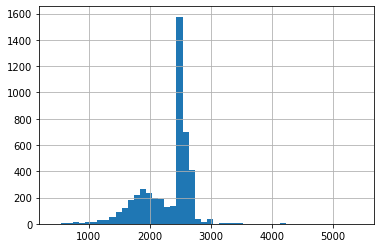

In [31]:
df_meta.ImageHeight.hist(bins=50)

<Axes: >

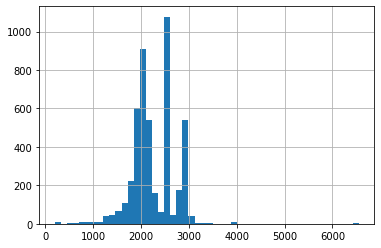

In [32]:
df_meta.ImageWidth.hist(bins=50)

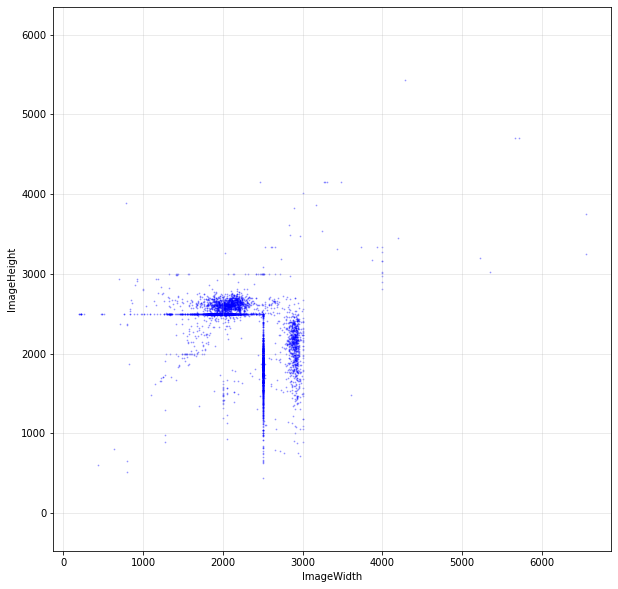

In [33]:
fig, ax = subplots(1, 1, figsize=(10,10))
df_meta.plot.scatter('ImageWidth', 'ImageHeight', s=0.7, alpha=0.3, color='b', ax=ax)
xlim(0, 6000)
ylim(0, 6000)
ax.axis('equal')
grid(lw=0.5, alpha=0.5)

In [52]:
df_meta.eval('aspect_ratio = ImageHeight / ImageWidth', inplace=True)

<Axes: >

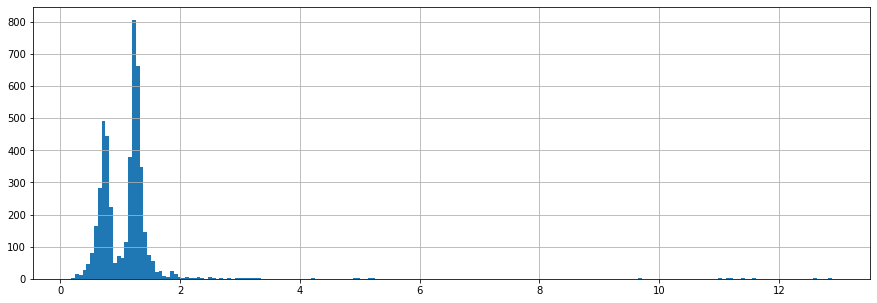

In [61]:
fig, ax=subplots(figsize=(15,5))
df_meta.aspect_ratio.hist(bins=200, ax=ax)


## Aspect ratio filtering

We'll only keep the images that have reasonable aspect ratios between 1:2 and 2:1.

In [63]:
df_meta = df_meta.query('0.5 <= aspect_ratio <= 2.0').copy()
df_meta

,SourceFile,ExifToolVersion,FileName,Directory,FileSize,FileModifyDate,FileAccessDate,FileInodeChangeDate,FilePermissions,FileType,...,PhotographicSensitivity,Label,Firmware,SensingMethod,CFAPattern,DigitalZoomRatio,GainControl,SubjectDistanceRange,ImageNumber,aspect_ratio
0,paintings/SK-A-10.jpeg,12.67,SK-A-10.jpeg,paintings,663 kB,2015:10:18 14:21:39+02:00,2025:02:14 06:49:52+01:00,2025:02:14 06:50:07+01:00,-rw-r--r--,JPEG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.765850
1,paintings/SK-A-100.jpeg,12.67,SK-A-100.jpeg,paintings,420 kB,2015:10:18 14:21:39+02:00,2025:02:14 06:49:52+01:00,2025:02:14 06:50:07+01:00,-rw-r--r--,JPEG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.255020
2,paintings/SK-A-1000.jpeg,12.67,SK-A-1000.jpeg,paintings,742 kB,2015:10:18 14:21:39+02:00,2025:02:14 06:49:52+01:00,2025:02:14 06:50:09+01:00,-rw-r--r--,JPEG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.173488
3,paintings/SK-A-1002.jpeg,12.67,SK-A-1002.jpeg,paintings,642 kB,2015:10:18 14:21:39+02:00,2025:02:14 06:49:52+01:00,2025:02:14 06:50:09+01:00,-rw-r--r--,JPEG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.731600
4,paintings/SK-A-1003.jpeg,12.67,SK-A-1003.jpeg,paintings,716 kB,2015:10:18 14:21:40+02:00,2025:02:14 06:49:52+01:00,2025:02:14 06:50:09+01:00,-rw-r--r--,JPEG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.099868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4717,paintings/SK-C-95.jpeg,12.67,SK-C-95.jpeg,paintings,542 kB,2015:10:18 14:36:33+02:00,2025:02:14 06:49:52+01:00,2025:02:14 06:50:15+01:00,-rw-r--r--,JPEG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.286008
4718,paintings/SK-C-97.jpeg,12.67,SK-C-97.jpeg,paintings,547 kB,2015:10:18 14:36:33+02:00,2025:02:14 06:49:52+01:00,2025:02:14 06:50:14+01:00,-rw-r--r--,JPEG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.251878
4719,paintings/SK-C-98.jpeg,12.67,SK-C-98.jpeg,paintings,388 kB,2015:10:18 14:36:33+02:00,2025:02:14 06:49:52+01:00,2025:02:14 06:50:14+01:00,-rw-r--r--,JPEG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.784400
4720,paintings/SK-C-983.jpeg,12.67,SK-C-983.jpeg,paintings,410 kB,2015:10:18 14:36:33+02:00,2025:02:14 06:49:52+01:00,2025:02:14 06:50:15+01:00,-rw-r--r--,JPEG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.548947


In [64]:
from sympy import factorint

In [65]:
factorint(len(df_meta))

{2: 2, 17: 1, 67: 1}

In [66]:
len(df_meta) // 67

68

Thus, with this aspect ratio filtration, we can fill a nearly square grid of 67 rows and 68 columns.

We now reunify the image metadata with the object metadata into a single dataframe.

In [71]:
# n.b. inner join
df_paint = df_paint.merge(df_meta.rename(columns=dict(FileName='filename')))

In [80]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(df_paint.iloc[0:1])

,showImage,label,scLabelLine,subTitle,longTitle,physicalMedium,physicalProperties,dimensions,principalOrFirstMaker,catRefRPK,documentation,inscriptions,historicalPersons,objectTypes,labelText,description,titles,normalized32Colors,normalizedColors,colorsWithNormalization,colors,links,id,priref,objectNumber,language,title,copyrightHolder,webImage,objectCollection,makers,principalMakers,plaqueDescriptionDutch,plaqueDescriptionEnglish,principalMaker,artistRole,associations,acquisition,exhibitions,materials,techniques,productionPlaces,dating,classification,hasImage,imgPath,filename,SourceFile,ExifToolVersion,Directory,FileSize,FileModifyDate,FileAccessDate,FileInodeChangeDate,FilePermissions,FileType,FileTypeExtension,MIMEType,JFIFVersion,ExifByteOrder,Orientation,XResolution,YResolution,ResolutionUnit,Software,ModifyDate,ColorSpace,ExifImageWidth,ExifImageHeight,Compression,ThumbnailOffset,ThumbnailLength,CurrentIPTCDigest,ApplicationRecordVersion,IPTCDigest,DisplayedUnitsX,DisplayedUnitsY,PrintStyle,PrintPosition,PrintScale,GlobalAngle,GlobalAltitude,CopyrightFlag,URL_List,SlicesGroupName,NumSlices,PixelAspectRatio,PhotoshopThumbnail,HasRealMergedData,WriterName,ReaderName,PhotoshopQuality,PhotoshopFormat,XMPToolkit,MetadataDate,CreateDate,CreatorTool,Tag,Format,ColorMode,History,InstanceID,NativeDigest,ImageWidth,ImageHeight,EncodingProcess,BitsPerSample,ColorComponents,YCbCrSubSampling,ImageSize,Megapixels,ThumbnailImage,Changes,ICCProfileName,ProfileCMMType,ProfileVersion,ProfileClass,ColorSpaceData,ProfileConnectionSpace,ProfileDateTime,ProfileFileSignature,PrimaryPlatform,CMMFlags,DeviceManufacturer,DeviceModel,DeviceAttributes,RenderingIntent,ConnectionSpaceIlluminant,ProfileCreator,ProfileID,ProfileCopyright,ProfileDescription,MediaWhitePoint,RedTRC,GreenTRC,BlueTRC,RedMatrixColumn,GreenMatrixColumn,BlueMatrixColumn,PhotometricInterpretation,ImageDescription,Make,Model,SamplesPerPixel,Artist,Copyright,ExposureTime,FNumber,ExposureProgram,ISO,ExifVersion,DateTimeOriginal,ShutterSpeedValue,ApertureValue,MeteringMode,FocalLength,Caption-Abstract,By-line,Keywords,CopyrightNotice,URL,DateCreated,Category,Urgency,PlanarConfiguration,DateTimeDigitized,WebStatement,Marked,DocumentID,OriginalDocumentID,FlashFired,FlashReturn,FlashMode,FlashFunction,FlashRedEyeMode,Description,Creator,Rights,Subject,UsageTerms,HistoryAction,HistoryInstanceID,HistoryWhen,HistorySoftwareAgent,HistoryChanged,HistoryParameters,DerivedFromInstanceID,DerivedFromDocumentID,DerivedFromOriginalDocumentID,Aperture,ShutterSpeed,Flash,FocalLength35efl,LightValue,MaxApertureValue,SubjectDistance,FocalLengthIn35mmFormat,CodedCharacterSet,TimeCreated,Lens,SerialNumber,DocumentAncestors,ScaleFactor35efl,DateTimeCreated,CircleOfConfusion,DOF,FOV,HyperfocalDistance,FocalPlaneXResolution,FocalPlaneYResolution,FocalPlaneResolutionUnit,ExposureCompensation,ExposureMode,Modified,ModifiedSize,Created,Saturation,Selection,GrayBalance,Filter,DevelopCurve,Height,Moire,Grain,ICCColor,Scale,Width,ColorLook,Sharp,Resolution,Flags,Title,AlreadyApplied,LegacyIPTCDigest,Rating,HasCrop,CropAngle,CropRight,CropBottom,CropLeft,CropTop,HasSettings,CameraProfileDigest,CameraProfile,ConvertToGrayscale,PostCropVignetteAmount,SharpenEdgeMasking,SharpenDetail,SharpenRadius,ParametricHighlightSplit,ParametricMidtoneSplit,ParametricShadowSplit,ParametricHighlights,ParametricLights,ParametricDarks,ParametricShadows,SplitToningBalance,SplitToningHighlightSaturation,SplitToningHighlightHue,SplitToningShadowSaturation,SplitToningShadowHue,LuminanceAdjustmentMagenta,LuminanceAdjustmentPurple,LuminanceAdjustmentBlue,LuminanceAdjustmentAqua,LuminanceAdjustmentGreen,LuminanceAdjustmentYellow,LuminanceAdjustmentOrange,LuminanceAdjustmentRed,SaturationAdjustmentMagenta,SaturationAdjustmentPurple,SaturationAdjustmentBlue,SaturationAdjustmentAqua,SaturationAdjustmentGreen,SaturationAdjustmentYellow,SaturationAdjustmentOrange,SaturationAdjustmentRed,HueAdjustmentMagenta,HueAdjustmentPurple,HueAdjustmentB

In [83]:
pd.DataFrame(df_paint.dating.to_list())

,period,yearLate,yearEarly,year,latePrecision,late,earlyPrecision,early
0,17,1692.0,1692.0,1692.0,None,None,None,None
1,19,1818.0,1818.0,1818.0,None,1818-01-01T00:00:00Z,None,1818-01-01T00:00:00Z
2,19,1869.0,1869.0,1869.0,None,1869-01-01T00:00:00Z,None,1869-01-01T00:00:00Z
3,19,1807.0,1807.0,1807.0,None,1807-01-01T00:00:00Z,None,1807-01-01T00:00:00Z
4,17,1690.0,1690.0,1690.0,None,None,None,None
...,...,...,...,...,...,...,...,...
4551,17,1683.0,1655.0,1655.0,None,None,None,None
4552,17,1663.0,1663.0,1663.0,None,None,None,None
4553,17,1656.0,1656.0,1656.0,None,None,None,None
4554,19,1910.0,1890.0,1890.0,ca.,1910-01-01T00:00:00Z,ca.,1890-01-01T00:00:00Z


In [88]:
df_paint.query('principalOrFirstMaker.str.contains("Johannes Vermeer")')[['filename']]

,filename
549,SK-A-1595.jpeg
1262,SK-A-2344.jpeg
1697,SK-A-2860.jpeg
4413,SK-C-251.jpeg


In [91]:
df_paint.query('principalOrFirstMaker == "Rembrandt Harmensz. van Rijn"')

,showImage,label,scLabelLine,subTitle,longTitle,physicalMedium,physicalProperties,dimensions,principalOrFirstMaker,catRefRPK,...,PhotographicSensitivity,Label,Firmware,SensingMethod,CFAPattern,DigitalZoomRatio,GainControl,SubjectDistanceRange,ImageNumber,aspect_ratio
857,True,"{'date': '2013-04-08', 'notes': None, 'descrip...","Rembrandt Harmensz van Rijn (1606–1669), oliev...","h 29,5cm × b 42,5cm × d 5,5cm","Landschap met stenen brug, Rembrandt Harmensz....",olieverf op paneel,[],"[{'value': '29,5', 'part': None, 'type': 'hoog...",Rembrandt Harmensz. van Rijn,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.703857
1869,True,"{'date': '2013-04-08', 'notes': None, 'descrip...","Rembrandt Harmensz van Rijn (1606–1669), oliev...",h 60cm × b 48cm,"Oude lezende vrouw, waarschijnlijk de profetes...",olieverf op paneel,[],"[{'value': '60', 'part': None, 'type': 'hoogte...",Rembrandt Harmensz. van Rijn,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.254034
1934,True,"{'date': '2013-04-11', 'notes': None, 'descrip...","Rembrandt Harmensz van Rijn (1606–1669), oliev...",h 154cm × b 169cm,"De verloochening van Petrus, Rembrandt Harmens...",olieverf op doek,[],"[{'value': '154', 'part': None, 'type': 'hoogt...",Rembrandt Harmensz. van Rijn,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.914894
1936,True,"{'date': '2015-05-01', 'notes': None, 'descrip...","Rembrandt Harmensz van Rijn (1606–1669), oliev...","h 79,5cm × b 67,7cm","Rembrandts zoon Titus in monniksdracht, Rembra...",olieverf op doek,[],"[{'value': '79,5', 'part': None, 'type': 'hoog...",Rembrandt Harmensz. van Rijn,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.188755
2020,True,"{'date': '2013-04-08', 'notes': None, 'descrip...","Rembrandt Harmensz van Rijn (1606–1669), oliev...",h 58cm × b 46cm,Jeremia treurend over de verwoesting van Jeruz...,olieverf op paneel,[],"[{'value': '58', 'part': 'drager', 'type': 'ho...",Rembrandt Harmensz. van Rijn,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.271084
2077,True,"{'date': '2013-04-08', 'notes': None, 'descrip...","Rembrandt Harmensz van Rijn (1606–1669), oliev...","h 72cm × b 54,5cm","Man in oosterse kleding, Rembrandt Harmensz. v...",olieverf op paneel,[],"[{'value': '72', 'part': None, 'type': 'hoogte...",Rembrandt Harmensz. van Rijn,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.328859
2199,True,None,Rembrandt Harmensz. van Rijn (15-jul-1606 - 08...,h 51cm × b 39cm,Jozef vertelt zijn dromen aan zijn ouders en z...,olieverf op papier op karton,[],"[{'value': '51', 'part': 'drager', 'type': 'ho...",Rembrandt Harmensz. van Rijn,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.310062
2663,True,"{'date': '2013-04-11', 'notes': None, 'descrip...","Rembrandt Harmensz van Rijn (1606–1669), oliev...","h 145cm × b 135,5cm","Stilleven met pauwen, Rembrandt Harmensz. van ...",olieverf op doek,[],"[{'value': '145', 'part': 'drager', 'type': 'h...",Rembrandt Harmensz. van Rijn,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.046624
2664,True,None,Rembrandt Harmensz. van Rijn (15-jul-1606 - 08...,h 19cm × b 15cm,"Portret van een man, vermoedelijk Dr. Ephraïm ...",olieverf op paneel,[],"[{'value': '19', 'part': 'drager', 'type': 'ho...",Rembrandt Harmensz. van Rijn,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.235457
2729,True,"{'date': '2015-04-17', 'notes': None, 'descrip...","Rembrandt Harmensz van Rijn (1606–1669), oliev...",h 91cm × b 77cm,"Zelfportret als de apostel Paulus, Rembrandt H...",olieverf op doek,[],"[{'value': '91', 'part': None, 'type': 'hoogte...",Rembrandt Harmensz. van Rijn,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.191080


<Axes: >

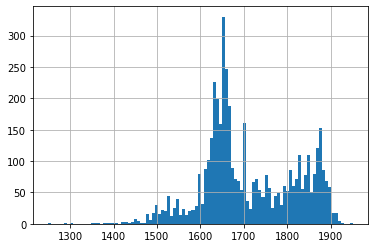

In [85]:
pd.DataFrame(df_paint.dating.to_list()).year.hist(bins=100)

In [105]:
df_paint['min_dim'] = np.minimum(df_paint.ImageWidth, df_paint.ImageHeight)

<Axes: >

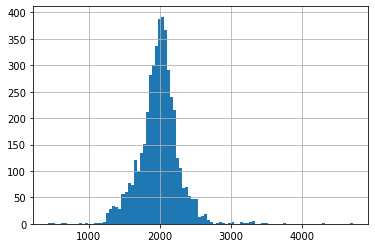

In [110]:
df_paint.min_dim.hist(bins=100)

In [111]:
df_paint.to_json('Rijksmuseum_painting_metadata.json')

In [114]:
%pwd

'/fast/MVA_2025/data/rijksmuseum_data/images'

In [124]:
!mkdir paintings_800px

## Resizing

We resize the images to a maximum dimension of 800px very efficiently using [GNU parallel](https://www.gnu.org/software/parallel/) and the [vips command-line tools](https://libvips.org) are installed.  Specifically, we use [`vipsthumbnail`](https://www.libvips.org/API/current/Using-vipsthumbnail.html).

In [125]:
!parallel --bar vipsthumbnail --size 800x800 ::: paintings/*.jpeg

100% 4722:0=0s paintings/SK-NM-8041.jpeg                                        


In [126]:
!mv paintings/tn* paintings_800px/

In [129]:
# remove the leading tn_
!rename s/tn_// paintings_800px/*
!rename s/jpeg/jpg/ paintings_800px/*